<a href="https://colab.research.google.com/github/shreejitp/Anova/blob/main/One_way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA

Often we come across an important factor or variable that has a lot of interest. In a SaaS business for example, you could have AOV or churn as attributes the business cares about. Sometimes you want to look at the association of those important factors with a few variables. 

You could end up looking for association between

a) Continuous and Continuous variable
b) Continuous and Categorical variable 
c) Categorical and Categorical variable 


There are a number of stastical tests availabe to understand the assocication among/between different variables. 


ANOVA looks at association between a continuous variable and a categorical variable. 


References- https://www.pythonfordatascience.org/anova-python/


One Way Anova


ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used to test for a statistically significant difference of an outcome between 3 or more groups. Since it is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others. However, if the ANOVA is significant one cannot tell which group is different. In order to tell which group is different, one has to conduct planned or post-hoc comparisons. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable

In [ ]:
!pip install researchpy
import pandas as pd
import researchpy as rp

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [ ]:
df

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [ ]:
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dose    15 non-null     object
 1   libido  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [ ]:
df

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [ ]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


In [ ]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


In [ ]:
import scipy.stats as stats

In [ ]:
#df['libido'][df['dose'] == 'high']

In [ ]:
# THE PARATMETERS ARE BASICALLY LIBIDO VALUES FOR THE 3 GROUPS 
stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

Interpretation- There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.024

**One way Anova using Stats Model **

This method conducts a one-way ANOVA in two steps:
1.Fit the model using an estimation method
2.Pass fitted model into ANOVA method to produce ANOVA table

In the case of an ANOVA, the independent variable will be categorical

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant; however, it does not provide any effect size measures to tell if the statistical significance is meaningful. The function below calculates eta-squared (
) and omega-squared (
). A quick note, 
 is the exact same thing as 
 except when coming from the ANOVA framework people call it 
; 
 is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model

In [ ]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


**INTERPRETATION**

A new medication was developed to increase libido. The purpose of this study was to test for a difference between the dosage levels. The overall average libido was 3.5 95% CI(2.5, 4.4) with group averages of 2.2 95% CI(0.9, 3.5) for the placebo group; 3.2 95% CI(1.9, 4.5) for the low dose group; and 5.0 95% CI(3.5, 6.5) for the high dose group. There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247, with an overall large effect, 
= 0.35.

In order to tell which groups differed significantly, post-hoc tests need to be conducted. Before one goes through that work, the assumptions should be checked first in case any modifications need to be made to the model

**Assumption Checks**

INDEPENDENCE

This assumption is tested when the study is designed. What this means is that all groups are mutually exclusive, i.e. an individual can only belong in one group. Also, this means that the data is not repeated measures (not collected through time). In this example, this condition is met.

NORMALITY

The assumption of normality is tested on the residuals of the model when coming from an ANOVA or regression framework. One method for testing the assumption of normality is the Shapiro-Wilk test. This can be completed using the shapiro() method from scipy.stats. Ensure that scipy.stats is imported for the following method to work. Unfortunately the output is not labelled, but it's (W-test statistic, p-value).

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

(0.916691780090332, 0.1714704930782318)

The test is non-significant, W= 0.9167, p= 0.1715, which indicates that the residuals are normally distributed.

Another way to test the assumption is through a visual check- this is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases. 

One method of visually checking the distribution is to use a probability plot with or without the correlation value, 
R
2
, to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the probplot() method from Scipy.stats. If using the 
R
2
 measure, one can refer to the NIST/SEMATECH e-handbook of statistical methods to see if the value is significant.

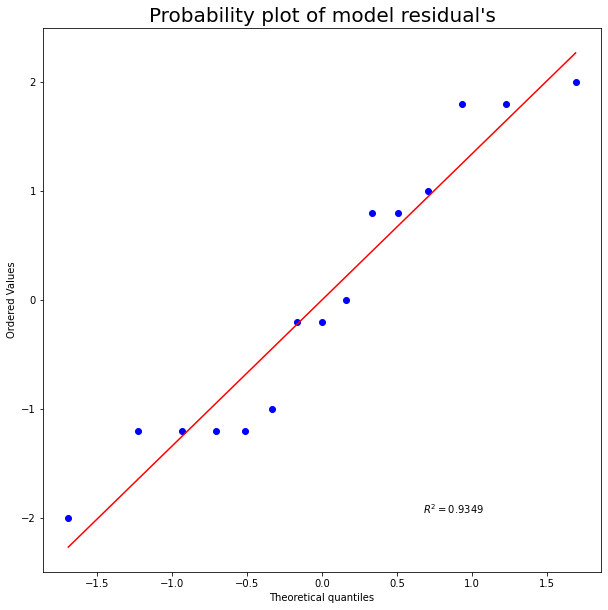

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

**HOMOGENEITY OF VARIANCE**

In [ ]:
stats.levene(df['libido'][df['dose'] == 'high'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

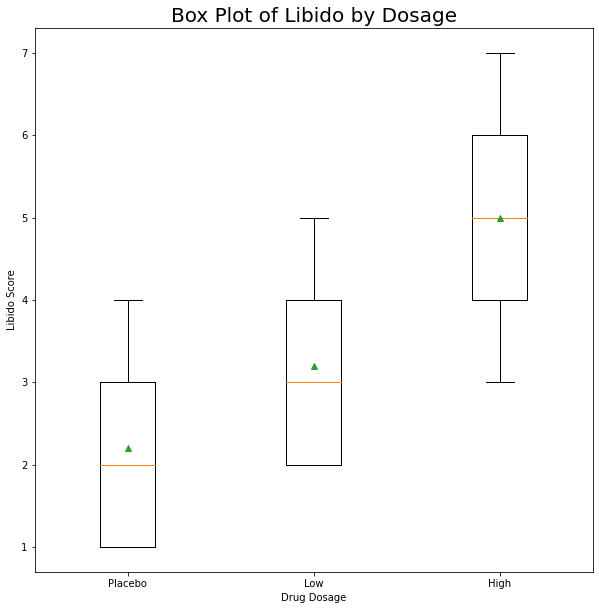

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()

**TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)**

In [ ]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.8,0.1472,-4.1651,0.5651,False
high,placebo,-2.8,0.0209,-5.1651,-0.4349,True
low,placebo,-1.0,0.5171,-3.3651,1.3651,False


Now to make sense of the table.

At the top the table testing information is provided
FWER is the familywise error rate, i.e. what  is being set to and controlled at
group1 and group2 columns are the groups being compared
- meandiff is the difference between the group means
- p-adj is the corrected p-value which takes into account the multiple comparisons being conducted
- lower is the lower band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.
- upper is the upper band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05. Reject is the decision rule based on the corrected p-value

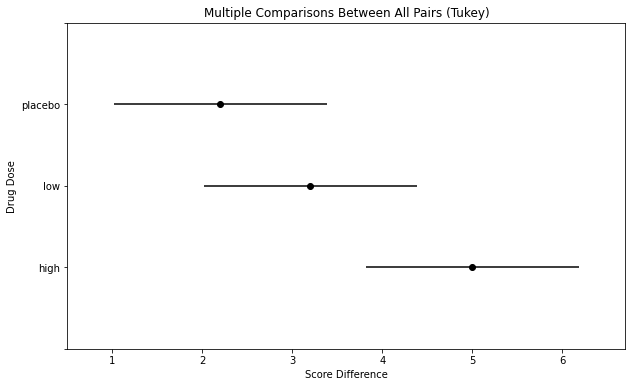

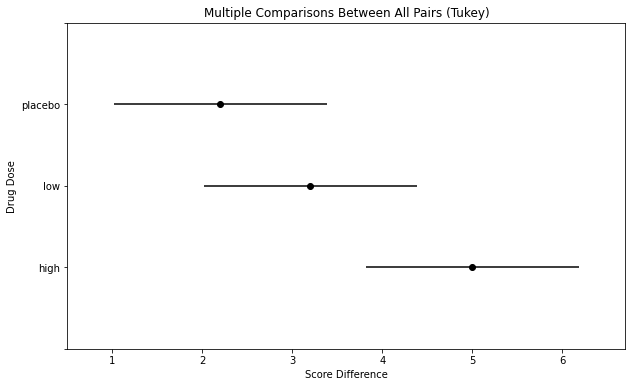

In [ ]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")

Using Tukey HSD to test for differences between groups indicates that there is a statistically significant difference in libido score between those who took the placebo and those who took the high dosage of the medication, no other groups differed significantly. What this indicates is that the high dosage of the medication is effective at increasing libido, but the low dosage is not.

**BONFERRONI CORRECTION**

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy 

comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(scipy.stats.ttest_ind,method="bonf") ## In the ref document scipy not included 
tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2554,False
high,placebo,3.0551,0.0157,0.0471,True
low,placebo,1.2127,0.2598,0.7795,False


Now to make sense of the table.

At the top the table testing information is provided
FWER is the familywise error rate, i.e. what 
α
 is being set to and controlled at
method is the correction method that is being applied to the p-values
Then there is the adjusted p-value (adjusted 
α
) for both the Sidak and Bonferroni correction methods
group1 and group2 columns are the groups being compared
stat is the test statistic value; in this case it would be the t statistic
pval is the uncorrected p-value returned from the supplied "statistical_test_method"
pval_corr is the corrected p-value which has been corrected using whichever "correction_method" was supplied
reject is the decision rule based on the corrected p-value
Conducting comparisons using the Bonferroni correction indicates that the only groups that differed significantly are those who took the high dose and the placebo dose.

**DUNN-ŠIDÁK CORRECTION**

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy 

comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(scipy.stats.ttest_ind,method="sidak") ## In the ref document scipy not included 
tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2343,False
high,placebo,3.0551,0.0157,0.0464,True
low,placebo,1.2127,0.2598,0.5945,False


Now to make sense of the table.

At the top the table testing information is provided
FWER is the familywise error rate, i.e. what 
α
 is being set to and controlled at
method is the correction method that is being applied to the p-values
Then there is the adjusted p-value (adjusted 
α
) for both the Sidak and Bonferroni correction methods
group1 and group2 columns are the groups being compared
stat is the test statistic value; in this case it would be the t statistic
pval is the uncorrected p-value returned from the supplied "statistical_test_method"
pval_corr is the corrected p-value which has been corrected using whichever "correction_method" was supplied
reject is the decision rule based on the corrected p-value
Conducting comparisons using the Šidák correction indicates that the only groups that differed significantly are those who took the high dose and the placebo dose.

# Non Parametric Alternative 

A non parametric alternative to one way anova is the Kruskal Wallis H test 

Researchers want to know if three different fertilizers lead to different levels of plant growth. They randomly select 30 different plants and split them into three groups of 10, applying a different fertilizer to each group. At the end of one month they measure the height of each plant

In [ ]:
group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

In [ ]:
#Perform the Kruskal-Wallis Test

from scipy import stats

#perform Kruskal-Wallis Test 
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=6.287801578353988, pvalue=0.043114289703508814)

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median is equal across all groups.

The alternative hypothesis: (Ha): The median is not equal across all groups.